In [1]:
import pandas as pd
data=pd.read_csv('final_data.csv', parse_dates = ['Issuance Date'], index_col = ['Issuance Date'])
data

,Quantity
Issuance Date,
2005-07-31,2149397.0
2005-08-31,0.0
2005-09-30,0.0
2005-10-31,1898000.0
2005-11-30,0.0
...,...
2022-08-31,4345753.0
2022-09-30,5108260.0
2022-10-31,1941753.0


In [2]:
data.columns

Index(['Quantity'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210 entries, 2005-07-31 to 2022-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quantity  210 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [5]:
data = data.resample('M').sum()

In [6]:
tab =  data.loc[:'2019-02-11',:]
tab.to_csv('tableau.csv')

In [7]:
data = pd.read_csv('final_data.csv')

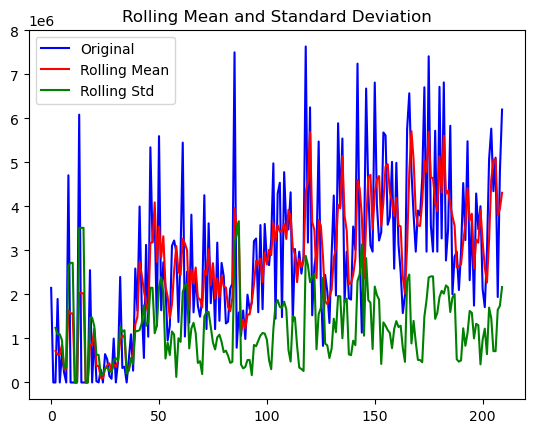

In [8]:
import matplotlib.pyplot as plt

rolling_mean = data['Quantity'].rolling(window=3).mean()
rolling_std = data['Quantity'].rolling(window=3).std()

plt.plot(data['Quantity'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()

In [9]:
data

,Issuance Date,Quantity
0,2005-07-31,2149397.0
1,2005-08-31,0.0
2,2005-09-30,0.0
3,2005-10-31,1898000.0
4,2005-11-30,0.0
...,...,...
205,2022-08-31,4345753.0
206,2022-09-30,5108260.0
207,2022-10-31,1941753.0
208,2022-11-30,4787773.0


In [10]:
data = data.set_index('Issuance Date')
data

,Quantity
Issuance Date,
2005-07-31,2149397.0
2005-08-31,0.0
2005-09-30,0.0
2005-10-31,1898000.0
2005-11-30,0.0
...,...
2022-08-31,4345753.0
2022-09-30,5108260.0
2022-10-31,1941753.0


In [11]:
data.index = pd.to_datetime(data.index)
data.index = data.index.to_period('M')
data.index = data.index.to_timestamp(freq='M')

In [12]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data)
adftest[1]

0.18203066400320272

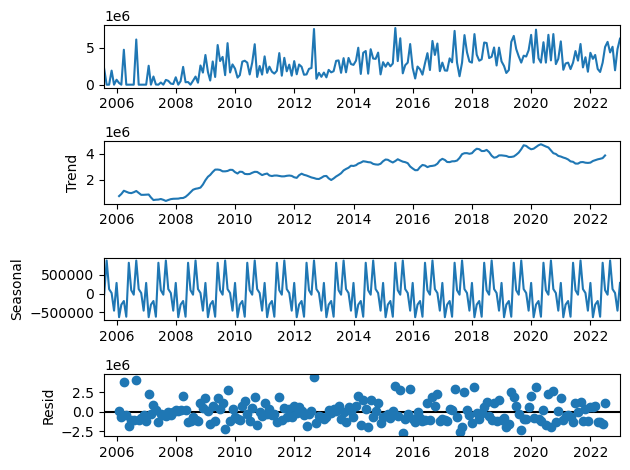

In [13]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data, model = 'additive')
fig = decomposition.plot()
plt.show()

<AxesSubplot: xlabel='Issuance Date'>

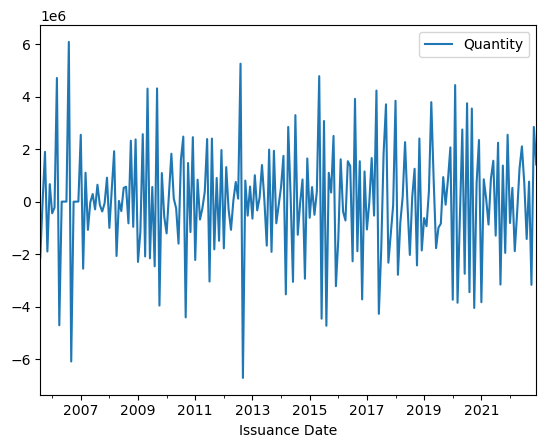

In [14]:
data = data.diff(periods = 1)
data = data.dropna()
data.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data)
adftest[1]

2.132728943320429e-15

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
arr = np.array(data['Quantity'])
arr = arr.reshape(-1,1)
scaler.fit(arr)
data['Quantity'] = scaler.transform(arr)
data

,Quantity
Issuance Date,
2005-08-31,-0.997669
2005-09-30,-0.008918
2005-10-31,0.864187
2005-11-30,-0.882023
2005-12-31,0.298145
...,...
2022-08-31,-0.663206
2022-09-30,0.341845
2022-10-31,-1.465553


In [36]:
train = data.loc[:'2019-02-11',:]
val = data['2019-05-31': '2023-01-31']
val.shape

(44, 1)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train, lags=10)
plt.show()

plot_pacf(train, lags=10)
plt.show()

In [18]:
import itertools
p = range(0, 7)
q = range(0,6)
d = range(0,2)
pdq = list(itertools.product(p,d,q))
len(pdq)

84

In [ ]:
pdq[83]

In [19]:
rmse = []
order = []

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
import numpy as np
for comb in pdq:
    model = ARIMA(data, order=comb).fit()
    pred = model.predict(start='2019-05-31', end='2022-12-31')
    error = np.sqrt(mean_squared_error(pred, val))
    order.append(comb)
    rmse.append(error)
rmse

[1.024403602088729,
 0.7280243723797679,
 0.724189461858667,
 0.7187040502050146,
 0.7041963954934544,
 0.7106320970352273,
 1.8682869900689434,
 1.0271982002078628,
 0.728942527012543,
 0.726054990399615,
 0.7206380645107178,
 0.7066481205772382,
 0.8060233332223294,
 0.7233959225892076,
 0.7205884402502365,
 0.7148046707973947,
 0.7051515928004158,
 0.6936542109853712,
 1.1696105140186301,
 0.8083031593999422,
 0.7251539767367294,
 0.7258903803029664,
 0.722154311946639,
 0.7155819282916359,
 0.7959903852893508,
 0.7193468318369228,
 0.7180361866808418,
 0.7189039153124195,
 0.7146449459925204,
 0.691112256068222,
 1.0107742912810385,
 0.7980122701352023,
 0.719682596284367,
 0.7208772517095274,
 0.6736415846407039,
 0.6909329689194741,
 0.8113405916533967,
 0.7132689784868814,
 0.7190947183277754,
 0.7162973277073422,
 0.715762065842818,
 0.7155649691962379,
 1.037319655103866,
 0.8128661675529597,
 0.7921843548661025,
 0.7605573275755853,
 0.6741142713037345,
 0.6696340819233113,
 

In [22]:
for i in range (len(rmse)):
    if rmse[i] == min(rmse):
        print (i)

83


In [23]:
order[83]

(6, 1, 5)

In [ ]:
val

In [24]:
model = ARIMA(data, order=(6,1,5))
results = model.fit()

predictions = results.predict(start='2019-05-31', end='2022-12-31')
print(predictions)
print (len(predictions))

Issuance Date
2019-05-31   -0.730311
2019-06-30   -1.018821
2019-07-31   -0.729395
2019-08-31    0.145691
2019-09-30    0.590504
2019-10-31   -0.087750
2019-11-30    0.303731
2019-12-31   -0.082714
2020-01-31   -1.371782
2020-02-29    0.788855
2020-03-31   -1.458990
2020-04-30    0.488513
2020-05-31    0.637361
2020-06-30   -0.467996
2020-07-31    0.837400
2020-08-31   -1.144290
2020-09-30    0.911882
2020-10-31   -1.258157
2020-11-30    1.034848
2020-12-31    0.511916
2021-01-31   -0.651210
2021-02-28    1.425953
2021-03-31    0.554847
2021-04-30    0.591217
2021-05-31    0.989884
2021-06-30    0.478821
2021-07-31   -0.446310
2021-08-31    0.368366
2021-09-30   -0.831006
2021-10-31    0.634912
2021-11-30   -0.075317
2021-12-31    1.044609
2022-01-31   -0.438668
2022-02-28    0.165554
2022-03-31   -0.090184
2022-04-30    0.503571
2022-05-31    0.790712
2022-06-30    0.235855
2022-07-31   -0.739389
2022-08-31   -1.065247
2022-09-30   -0.232470
2022-10-31   -0.853264
2022-11-30    0.9472

In [25]:
np.sqrt(mean_squared_error(predictions, val))

0.6624374056475864

In [26]:
val.mean(), np.sqrt(val.var())

(Quantity   -0.004333
 dtype: float64,
 Quantity    1.036238
 dtype: float64)

In [29]:
predictions = predictions[1:43]
validation = validation[1:43]

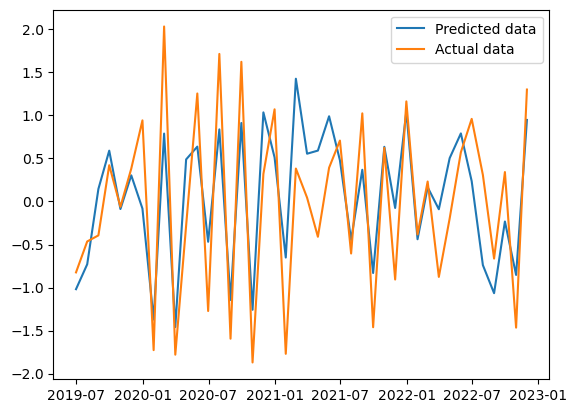

In [30]:
import matplotlib.pyplot as plt
plt.plot(predictions, label = 'Predicted data')
plt.plot(validation, label = 'Actual data')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
r2 = r2_score(validation, predictions)
r2

0.6293756978449789

In [37]:
order = []
rmse = []
from statsmodels.tsa.statespace.sarimax import SARIMAX
for comb in pdq:
    model = SARIMAX(data, order=comb, seasonal_order=(0, 1, 1, 12)).fit()
    pred = model.predict(start='2019-05-31', end='2022-12-31')
    error = np.sqrt(mean_squared_error(pred, val))
    order.append(comb)
    rmse.append(error)
rmse

[1.034507403540647,
 0.7248913075359754,
 0.720343086053287,
 0.7180316650243747,
 0.6897030204260879,
 0.6915099221891253,
 1.9120487543904152,
 1.0422283686778975,
 0.7252000898322435,
 0.7235886780668296,
 0.7225534624928647,
 0.6927933687826011,
 0.7981494602076641,
 0.7190468561608566,
 0.7160400777054362,
 0.7110056862469082,
 0.6903775958778755,
 0.6792812370464315,
 1.167060301772644,
 0.8048677019545325,
 0.7218094444938197,
 0.7233830269860513,
 0.7219225110567229,
 0.7188674001923931,
 0.7893921984955328,
 0.7145587593921032,
 0.7139861242688336,
 0.6586650509961528,
 0.6937287003556646,
 0.6802441391562588,
 1.0088941219913323,
 0.7941719776122806,
 0.7174027219790413,
 0.7199722216711935,
 0.6870185625940106,
 0.6586798695067809,
 0.8105478285805621,
 0.7111636398681657,
 0.6971048976644819,
 0.6960474737337934,
 0.6602850538644126,
 0.6930021061656495,
 1.0481802176305917,
 0.8155433936492156,
 0.7186959495236319,
 0.7549481363445892,
 0.6868851852413411,
 0.6639559498188

In [38]:
for i in range (len(rmse)):
    if rmse[i] == min(rmse):
        print (i)

77


In [39]:
pdq[77]

(6, 0, 5)

In [50]:
model = SARIMAX(data, order=(6, 0, 5), seasonal_order=(0, 1, 1, 12))
results = model.fit()

predictions = results.predict(start='2019-05-31', end='2022-12-31')
print(predictions)
print (len(predictions))

Issuance Date
2019-05-31   -0.586254
2019-06-30   -1.059661
2019-07-31   -0.642982
2019-08-31    0.263771
2019-09-30    0.745901
2019-10-31    0.123313
2019-11-30    0.348699
2019-12-31   -0.002991
2020-01-31   -1.532121
2020-02-29    0.542479
2020-03-31   -1.829449
2020-04-30    0.412507
2020-05-31    1.161696
2020-06-30   -0.527958
2020-07-31    1.306082
2020-08-31   -0.743174
2020-09-30    0.870403
2020-10-31   -1.099461
2020-11-30    0.490519
2020-12-31    0.446629
2021-01-31   -0.975332
2021-02-28    1.103186
2021-03-31    0.543993
2021-04-30    0.493350
2021-05-31    1.620820
2021-06-30    0.385450
2021-07-31   -0.163439
2021-08-31    0.689004
2021-09-30   -1.024734
2021-10-31    0.822341
2021-11-30   -0.341221
2021-12-31    1.136334
2022-01-31   -0.294383
2022-02-28    0.039950
2022-03-31    0.049358
2022-04-30    0.609703
2022-05-31    1.262306
2022-06-30    0.662904
2022-07-31   -0.591044
2022-08-31   -0.456685
2022-09-30   -0.144215
2022-10-31   -0.915586
2022-11-30    0.9909

In [51]:
predictions = predictions[1:43]
validation = val[1:43]
predictions.shape

(42,)

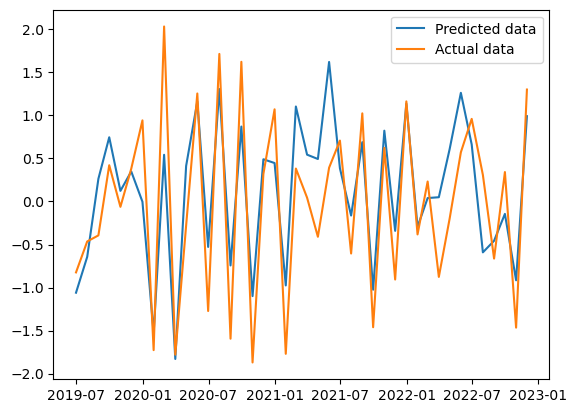

In [52]:
import matplotlib.pyplot as plt
plt.plot(predictions, label = 'Predicted data')
plt.plot(validation, label = 'Actual data')
plt.legend()
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_error, r2_score
r2 = r2_score(validation, predictions)
print (r2)

0.6575228465466558


In [ ]:
import itertools
a = range(0, 2)
b = range(1, 2)
c = range(1, 2)
d = range(1, 16)
abcd = list(itertools.product(a,b,c,d))
print (len(abcd))
abcd[1]

In [56]:
order = []
rmse = []
from statsmodels.tsa.statespace.sarimax import SARIMAX
for i in range(7, 30):
    model = SARIMAX(data, order=(6, 0, 5), seasonal_order=(6, 0, 5, i)).fit()
    pred = model.predict(start='2019-05-31', end='2022-12-31')
    error = np.sqrt(mean_squared_error(pred, val))
    order.append(i)
    rmse.append(error)
for i in range (len(rmse)):
    if rmse[i] == min(rmse):
        print (i)


13


In [57]:
order[20]

27

In [58]:
model = SARIMAX(data, order=(6, 0, 5), seasonal_order=(6, 0, 5, 20))
results = model.fit()

predictions = results.predict(start='2019-06-30', end='2022-11-30')
print(predictions)
print (len(predictions))

Issuance Date
2019-06-30   -1.022276
2019-07-31    0.023863
2019-08-31   -0.420438
2019-09-30    0.940722
2019-10-31    0.526873
2019-11-30    0.131550
2019-12-31    0.519946
2020-01-31   -1.527829
2020-02-29    0.616161
2020-03-31   -1.608795
2020-04-30    0.432003
2020-05-31    0.926479
2020-06-30   -0.996272
2020-07-31    1.082474
2020-08-31   -1.595756
2020-09-30    0.266673
2020-10-31   -0.972810
2020-11-30    0.255794
2020-12-31    0.962785
2021-01-31   -1.378960
2021-02-28    0.969311
2021-03-31    0.662443
2021-04-30    0.221992
2021-05-31    0.488608
2021-06-30    0.284947
2021-07-31   -0.181185
2021-08-31    0.869161
2021-09-30   -0.741890
2021-10-31    1.080196
2021-11-30   -0.177301
2021-12-31    1.236048
2022-01-31   -0.305341
2022-02-28    0.371183
2022-03-31   -0.175230
2022-04-30    0.515900
2022-05-31    1.080112
2022-06-30    0.808392
2022-07-31   -0.592216
2022-08-31   -0.265524
2022-09-30    0.349980
2022-10-31   -0.627140
2022-11-30    1.324255
Freq: M, Name: predi

In [59]:
val = val['2019-06-30': '2022-11-30']

In [60]:
compare = pd.concat([val, predictions], axis = 1)
compare

,Quantity,predicted_mean
Issuance Date,,
2019-06-30,-0.823764,-1.022276
2019-07-31,-0.464331,0.023863
2019-08-31,-0.393841,-0.420438
2019-09-30,0.421346,0.940722
2019-10-31,-0.062167,0.526873
2019-11-30,0.380960,0.131550
2019-12-31,0.942093,0.519946
2020-01-31,-1.726824,-1.527829
2020-02-29,2.032982,0.616161


In [84]:
pred = predictions[5:]
validation = val[5:]

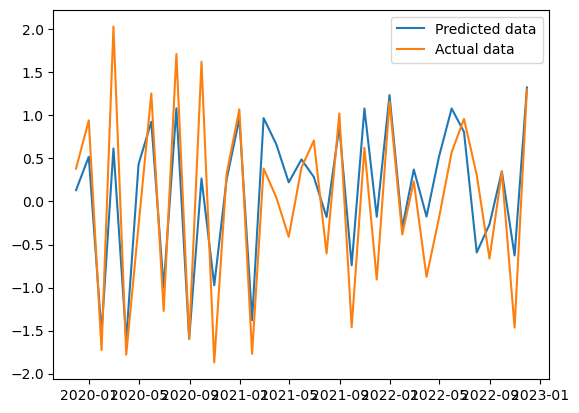

In [85]:
import matplotlib.pyplot as plt
plt.plot(pred, label = 'Predicted data')
plt.plot(validation, label = 'Actual data')
plt.legend()
plt.show()

In [86]:
from sklearn.metrics import mean_absolute_error, r2_score
r2 = r2_score(validation, pred)
r2

0.7302480279316739